In [3]:
med='../Medical_Report_Generation'

In [4]:
import os

os.listdir(med)

['Train_transformer_2.ipynb',
 'report_v4_models',
 'data',
 'iu_cxr_trainer_mditag_transformer_big.py',
 'mimic_cxr_tester_mditag_transformer_big.py',
 'settings',
 'pycocoevalcap_original',
 'utils',
 '.ipynb_checkpoints',
 'iu_cxr_tester_mditag_transformer_big.py',
 'mimic_cxr_trainer_mditag_transformer_big.py']

# 1. MIMIC - (Disease / Normal)

In [102]:
master='data/new_data_mimic/master_sheet.csv'

master=os.path.join(med, master)

In [103]:
import matplotlib.pyplot as plt

In [104]:
import pandas as pd
master=pd.read_csv(master)

abnormal_idx=master['Normal']==0
normal_idx=master['Normal']==1

abnormal_image_names = master['path'][abnormal_idx].str.slice(30, 74).values
normal_image_names = master['path'][normal_idx].str.slice(30,74).values

In [156]:
print(len(abnormal_image_names), len(normal_image_names), len(master))

723 360 1083


In [111]:
image_path=os.path.join(med, 'data/all_jpgs')

image_names=os.listdir(image_path)
# image_names=[im[:-4] for im in image_names]

In [112]:
os.path.join(image_path, image_names[0])

'../Medical_Report_Generation/data/all_jpgs/1488f154-0f98755c-d3ae69fa-6538878e-e4ccee0c.jpg'

In [127]:
from PIL import Image

In [161]:
normal_images=[]
abnormal_images=[]
for image_name in image_names:
    im=np.array(Image.open(os.path.join(image_path, image_name)).resize((224,224)))

    
    if image_name[:-4] in normal_image_names:
        normal_images.append(im)
    elif image_name[:-4] in abnormal_image_names:
        abnormal_images.append(im)
    else:
        raise NameError('bad')
    
    

## Input Image (Abnormal)

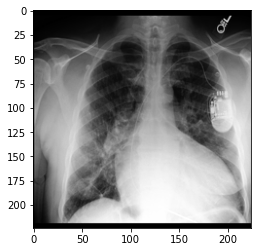

In [158]:
plt.imshow(abnormal_images[0], cmap='gray')

In [172]:
base=abnormal_images[0]

# Metrics  

RMSE(MSE), PSNR, SSIM, sre

https://emjayahn.github.io/2019/09/01/psnr-ssim/

## 1.1. MSE

In [254]:
from image_similarity_measures.quality_metrics import rmse, ssim, sre

In [356]:
def compare_two_image(im1, im2, metric='rmse'):
    "im1,im2 : np.ndarray"
    
    if im1.shape != im2.shape:
        assert NameError('두 이미지의 크기가 같아야 합니다.')
    
    shape=im1.shape
    
    if len(shape)==2:
        im1=im1.reshape(shape+(1,))
        im2=im2.reshape(shape+(1,))
    
    if metric=='rmse':
        score=rmse(im1, im2)
    elif metric=='ssim':
        score=ssim(im1,im2)
    elif metric=='sre':
        score=sre(im1,im2)
    else:
        pass
    
    
    return score

In [357]:
rmse_sim=[]

for i in range(len(normal_images)):
    score=compare_two_image(base, normal_images[i], metric='rmse')
    rmse_sim.append(score)

In [358]:
ssim_sim=[]

for i in range(len(normal_images)):
    score=compare_two_image(base, normal_images[i], metric='ssim')
    ssim_sim.append(score)

In [359]:
sre_sim=[]

for i in range(len(normal_images)):
    score=compare_two_image(base, normal_images[i], metric='sre')
    sre_sim.append(score)

In [361]:
rmse_idx=sorted(range(len(rmse_sim)), key=lambda k: rmse_sim[k])

rmse_top_5=rmse_idx[:5]
rmse_bot_5=rmse_idx[-5:]

In [367]:
sre_idx=sorted(range(len(sre_sim)), key=lambda k: sre_sim[k], reverse=True)

sre_top_5=sre_idx[:5]
sre_bot_5=sre_idx[-5:]

In [363]:
ssim_idx=sorted(range(len(ssim_sim)), key=lambda k: ssim_sim[k], reverse=True)

ssim_top_5=ssim_idx[:5]
ssim_bot_5=ssim_idx[-5:]

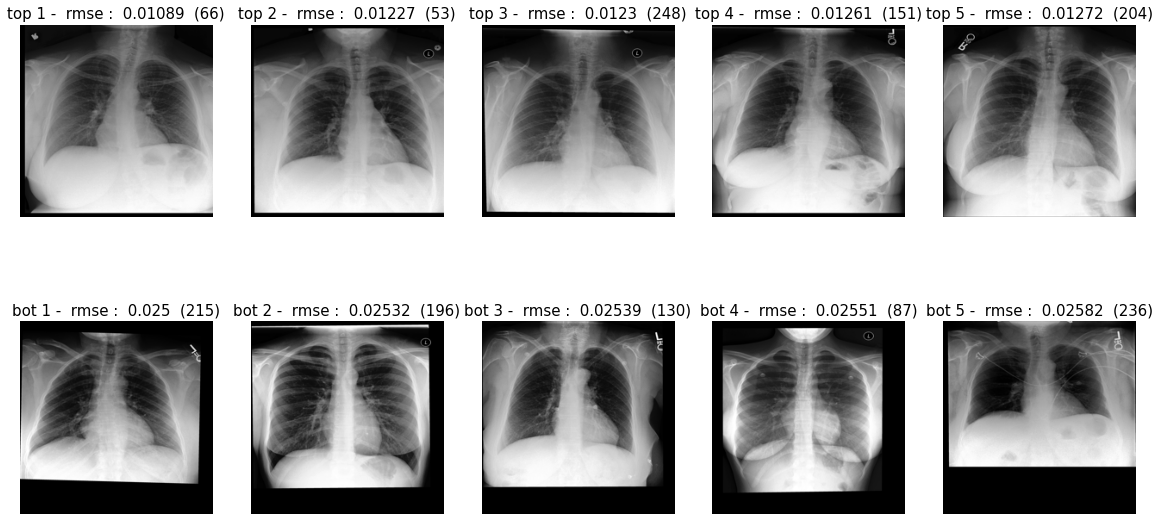

In [368]:
fig, axes=plt.subplots(2, 5, figsize=(20,10))


for i in range(len(top_5)):
    axes[0][i].imshow(normal_images[rmse_top_5[i]], cmap='gray')
    axes[0][i].set_title('top {} -  rmse :  {:.4}  ({})'.format(i+1, rmse_sim[top_5[i]], rmse_top_5[i]), size=15)
    axes[0][i].axis('off')

for i in range(len(bot_5)):
    axes[1][i].imshow(normal_images[rmse_bot_5[i]], cmap='gray')
    axes[1][i].set_title('bot {} -  rmse :  {:.4}  ({})'.format(i+1, rmse_sim[bot_5[i]], rmse_bot_5[i]), size=15)
    axes[1][i].axis('off')
    

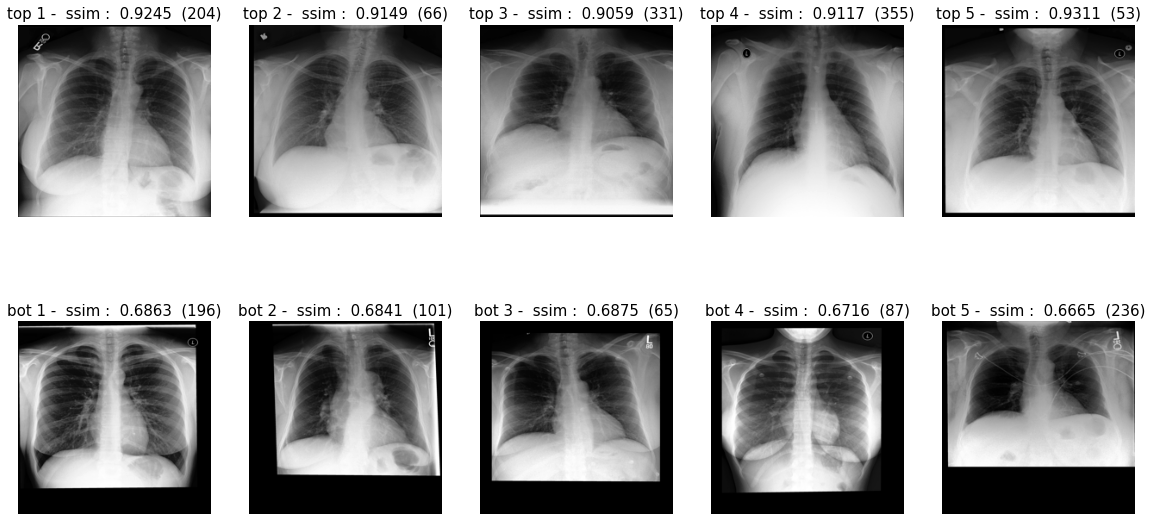

In [369]:
fig, axes=plt.subplots(2, 5, figsize=(20,10))


for i in range(len(top_5)):
    axes[0][i].imshow(normal_images[ssim_top_5[i]], cmap='gray')
    axes[0][i].set_title('top {} -  ssim :  {:.4}  ({})'.format(i+1, ssim_sim[top_5[i]], ssim_top_5[i]), size=15)
    axes[0][i].axis('off')

for i in range(len(bot_5)):
    axes[1][i].imshow(normal_images[ssim_bot_5[i]], cmap='gray')
    axes[1][i].set_title('bot {} -  ssim :  {:.4}  ({})'.format(i+1, ssim_sim[bot_5[i]], ssim_bot_5[i]), size=15)
    axes[1][i].axis('off')
    

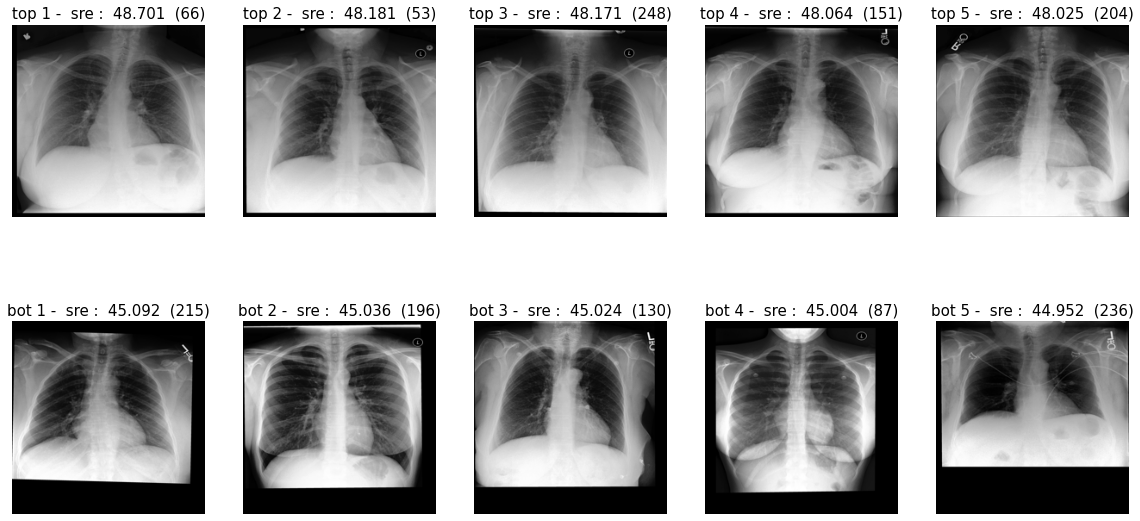

In [370]:
fig, axes=plt.subplots(2, 5, figsize=(20,10))


for i in range(len(top_5)):
    axes[0][i].imshow(normal_images[sre_top_5[i]], cmap='gray')
    axes[0][i].set_title('top {} -  sre :  {:.5}  ({})'.format(i+1, sre_sim[top_5[i]], sre_top_5[i]), size=15)
    axes[0][i].axis('off')

for i in range(len(bot_5)):
    axes[1][i].imshow(normal_images[sre_bot_5[i]], cmap='gray')
    axes[1][i].set_title('bot {} -  sre :  {:.5}  ({})'.format(i+1, sre_sim[bot_5[i]], sre_bot_5[i]), size=15)
    axes[1][i].axis('off')
    

## 육안으로 차이가 있을지.

In [377]:
rmse_idx=sorted(range(len(rmse_sim)), key=lambda k: rmse_sim[k])

rmse_top_5=rmse_idx[:5]
rmse_bot_5=rmse_idx[-150-5:-150]

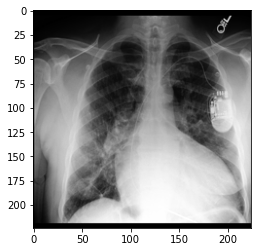

In [378]:
plt.imshow(abnormal_images[0], cmap='gray')

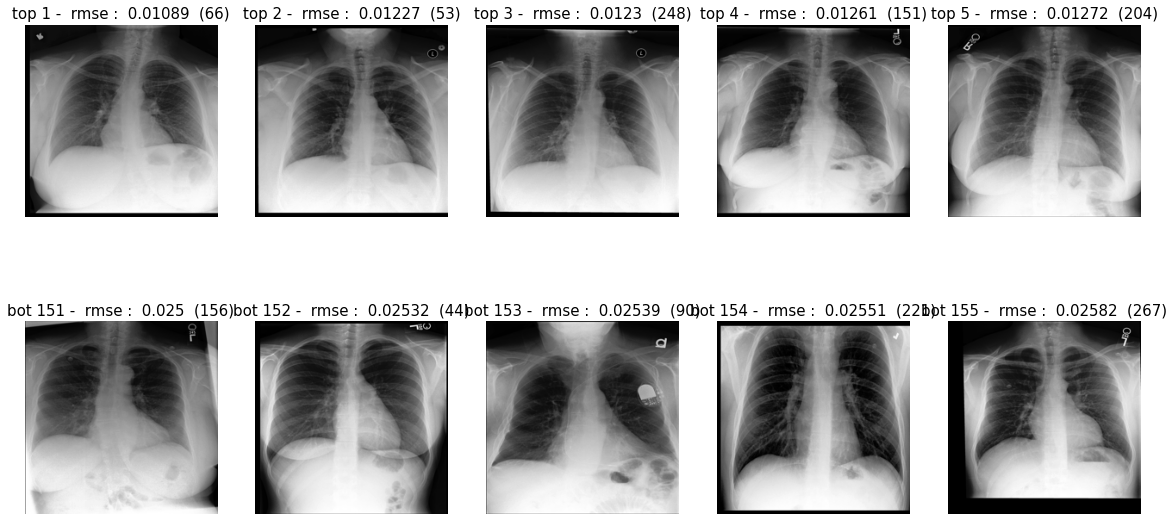

In [379]:
fig, axes=plt.subplots(2, 5, figsize=(20,10))


for i in range(len(top_5)):
    axes[0][i].imshow(normal_images[rmse_top_5[i]], cmap='gray')
    axes[0][i].set_title('top {} -  rmse :  {:.4}  ({})'.format(i+1, rmse_sim[top_5[i]], rmse_top_5[i]), size=15)
    axes[0][i].axis('off')

for i in range(len(bot_5)):
    axes[1][i].imshow(normal_images[rmse_bot_5[i]], cmap='gray')
    axes[1][i].set_title('bot {} -  rmse :  {:.4}  ({})'.format(i+151, rmse_sim[bot_5[i]], rmse_bot_5[i]), size=15)
    axes[1][i].axis('off')
    